In [7]:
import tensorflow as tf
import numpy as np

# --- Dataset ---
X = np.array([
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 1],
    [0, 1, 1]
], dtype=np.float32)

y = np.array([1, 1, 1, 0], dtype=np.float32)

# --- Hyperparameters ---
lr = 0.1
threshold = 0.5

# --- Initialize weights (3 inputs + bias) ---
W = tf.Variable(tf.zeros(3, dtype=tf.float32))
b = tf.Variable(0.0)

def perceptron_predict(x):
    z = tf.reduce_sum(x * W) + b
    return tf.cast(z > threshold, tf.float32)

# --- Training Loop ---
epochs = 0
while True:
    error_count = 0
    epochs += 1

    for i in range(len(X)):
        x_i = X[i]
        target = y[i]

        # prediction
        pred = perceptron_predict(x_i)

        # error = target - prediction
        error = target - pred

        if error != 0:
            # Perceptron weight update rule
            W.assign_add(lr * error * x_i)
            b.assign_add(lr * error)
            error_count += 1

    if error_count == 0:  # Converged
        break

print("Training complete in", epochs, "epochs")
print("Final Weights:", W.numpy())
print("Final Bias:", b.numpy())

# --- Test the perceptron ---
print("\nPredictions:")
for i in range(len(X)):
    print(X[i], "->", perceptron_predict(X[i]).numpy())


Training complete in 3 epochs
Final Weights: [0.4 0.  0.1]
Final Bias: 0.3

Predictions:
[1. 0. 0.] -> 1.0
[1. 0. 1.] -> 1.0
[1. 1. 1.] -> 1.0
[0. 1. 1.] -> 0.0


In [1]:
import tensorflow as tf
import numpy as np

# --- Dataset ---
X = np.array([
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 1],
    [0, 1, 1]
], dtype=np.float32)

y = np.array([1, 1, 1, 0], dtype=np.float32)

# --- Build perceptron model using Keras ---
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(3,))
])

# --- Compile model ---
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# --- Train the model ---
history = model.fit(
    X, y,
    epochs=2000,
    verbose=1
)

# --- Final predictions using threshold 0.5 ---
preds = (model.predict(X) > 0.5).astype(int)

print("\nFinal Predictions:")
for i in range(len(X)):
    print(X[i], "->", preds[i][0])

# --- Show final weights ---
w, b = model.layers[0].get_weights()
print("\nWeights:", w.flatten())
print("Bias:", b)


2025-11-27 04:24:54.293648: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764217494.494829      92 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764217494.550093      92 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1764217508.235275      92 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/d

Epoch 1/2000


I0000 00:00:1764217510.011960     125 service.cc:148] XLA service 0x78668c005280 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1764217510.012453     125 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1764217510.147463     125 cuda_dnn.cc:529] Loaded cuDNN version 90300


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 886ms/step - accuracy: 0.0000e+00 - loss: 1.0761
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.0000e+00 - loss: 1.0334
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0000e+00 - loss: 0.9943
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0000e+00 - loss: 0.9587
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0000e+00 - loss: 0.9262
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2500 - loss: 0.8965

I0000 00:00:1764217510.328167     125 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.2500 - loss: 0.8965
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.2500 - loss: 0.8693
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.2500 - loss: 0.8444
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.2500 - loss: 0.8215
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.2500 - loss: 0.8005
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5000 - loss: 0.7811
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5000 - loss: 0.7632
Epoch 13/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5000 - loss: 0.7465
Epoch 14/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5000 - loss: 0.7311
Epoch 15/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5000 - loss: 0.7166
Epoch 16/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5000 - loss: 0.7031
Epoch 17/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5000 

c:\Users\Hashir\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\Hashir\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\Hashir\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/fram

Epoch 1 - Training Accuracy: 0.4157
Epoch 2 - Training Accuracy: 0.5181
Epoch 3 - Training Accuracy: 0.5422
Epoch 4 - Training Accuracy: 0.5422
Epoch 5 - Training Accuracy: 0.5542
Epoch 6 - Training Accuracy: 0.5241
Epoch 7 - Training Accuracy: 0.7169
Epoch 8 - Training Accuracy: 0.6807
Epoch 9 - Training Accuracy: 0.6988
Epoch 10 - Training Accuracy: 0.6386
Epoch 11 - Training Accuracy: 0.6325
Epoch 12 - Training Accuracy: 0.7108
Epoch 13 - Training Accuracy: 0.6446
Epoch 14 - Training Accuracy: 0.7108
Epoch 15 - Training Accuracy: 0.6807
Epoch 16 - Training Accuracy: 0.6807
Epoch 17 - Training Accuracy: 0.6988
Epoch 18 - Training Accuracy: 0.6506
Epoch 19 - Training Accuracy: 0.7530

Training stopped: Accuracy goal reached.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

Test Accuracy: 0.7380952380952381


<Figure size 600x500 with 0 Axes>

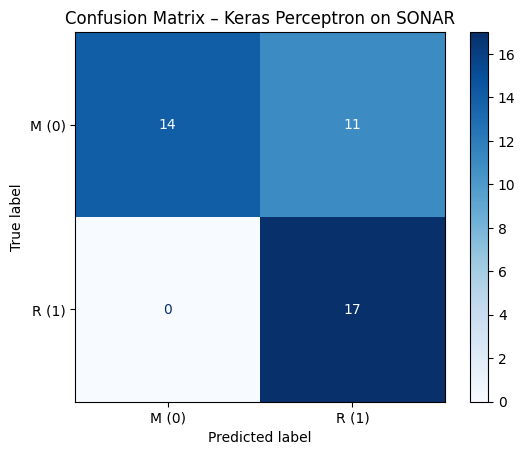

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

df = pd.read_csv("sonar.csv", header=None)

X = df.iloc[:, :-1].values.astype(np.float32)
y = df.iloc[:, -1].values

y = np.where(y == "R", 1, 0).astype(np.float32)


np.random.seed(42)
idx = np.random.permutation(len(X))

train_size = int(0.8 * len(X))
train_idx, test_idx = idx[:train_size], idx[train_size:]

X_train, y_train = X[train_idx], y[train_idx]
X_test,  y_test  = X[test_idx],  y[test_idx]


model = tf.keras.Sequential([
    tf.keras.layers.Dense(
        1,
        activation='sigmoid',
        input_shape=(60,),
        kernel_initializer=tf.keras.initializers.Zeros(),
        bias_initializer=tf.keras.initializers.Zeros()
    )
])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)


target_acc = 0.75
epoch = 0

while True:
    epoch += 1
    history = model.fit(X_train, y_train, epochs=1, verbose=0)

    acc = history.history['accuracy'][0]
    print(f"Epoch {epoch} - Training Accuracy: {acc:.4f}")

    if acc >= target_acc:
        print("\nTraining stopped: Accuracy goal reached.")
        break

y_prob = model.predict(X_test)
y_pred = (y_prob > 0.5).astype(int).flatten()

test_acc = np.mean(y_pred == y_test)
print("\nTest Accuracy:", test_acc)


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["M (0)", "R (1)"])

plt.figure(figsize=(6, 5))
disp.plot(cmap="Blues")
plt.title("Confusion Matrix  Keras Perceptron on SONAR")
plt.show()


In [3]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

# ----------------------------------------------------
# 1. Load the Iris dataset
# ----------------------------------------------------
data = load_iris()
X = data.data.astype(np.float32)      # Features: 4
y = data.target.reshape(-1, 1)        # Classes: 0,1,2

# One-hot encode target labels
enc = OneHotEncoder(sparse_output=False)
y_onehot = enc.fit_transform(y).astype(np.float32)

# ----------------------------------------------------
# 2. Shuffle + Split (80% train, 20% test)
# ----------------------------------------------------
np.random.seed(42)
idx = np.random.permutation(len(X))

train_size = int(0.8 * len(X))
train_idx, test_idx = idx[:train_size], idx[train_size:]

X_train, y_train = X[train_idx], y_onehot[train_idx]
X_test,  y_test  = X[test_idx],  y_onehot[test_idx]

# ----------------------------------------------------
# 3. Build Multi-layer Neural Network (MLP)
#    - Learning rate = 0.1
#    - Bias = 0
#    - Initial weights = 0
# ----------------------------------------------------
model = tf.keras.Sequential([
    tf.keras.layers.Dense(
        5, activation='sigmoid', input_shape=(4,),
        kernel_initializer=tf.keras.initializers.Zeros(),
        bias_initializer=tf.keras.initializers.Zeros()
    ),
    tf.keras.layers.Dense(
        3, activation='softmax',
        kernel_initializer=tf.keras.initializers.Zeros(),
        bias_initializer=tf.keras.initializers.Zeros()
    )
])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# ----------------------------------------------------
# 4. Train the network for 10,000 epochs
# ----------------------------------------------------
history = model.fit(
    X_train, y_train,
    epochs=10000,
    verbose=0  # change to 1 if you want logs
)

train_acc = history.history['accuracy'][-1]
print("Final Training Accuracy:", train_acc)

# ----------------------------------------------------
# 5. Test accuracy
# ----------------------------------------------------
y_prob = model.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

test_accuracy = accuracy_score(y_true, y_pred)
print("Testing Accuracy:", test_accuracy)


c:\Users\Hashir\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


KeyboardInterrupt: 